# Exercise 3.4

> Mixtures of beta priors: Estimate the probability $\theta$ of teen recidivism based on a study in which there were $n = 43$ individuals released from incarceration and $y = 15$ re-offenders within 36 months

##### Problem A

> Using a $beta(2,8)$ prior for $\theta$, plot $p(\theta)$, $p(y|\theta)$ and $p(\theta|y)$ as functions of $\theta$. Find the posterior mean, mode, and standard deviation of $\theta$. Find a 95% quantile-based confidence interval.

##### Solution

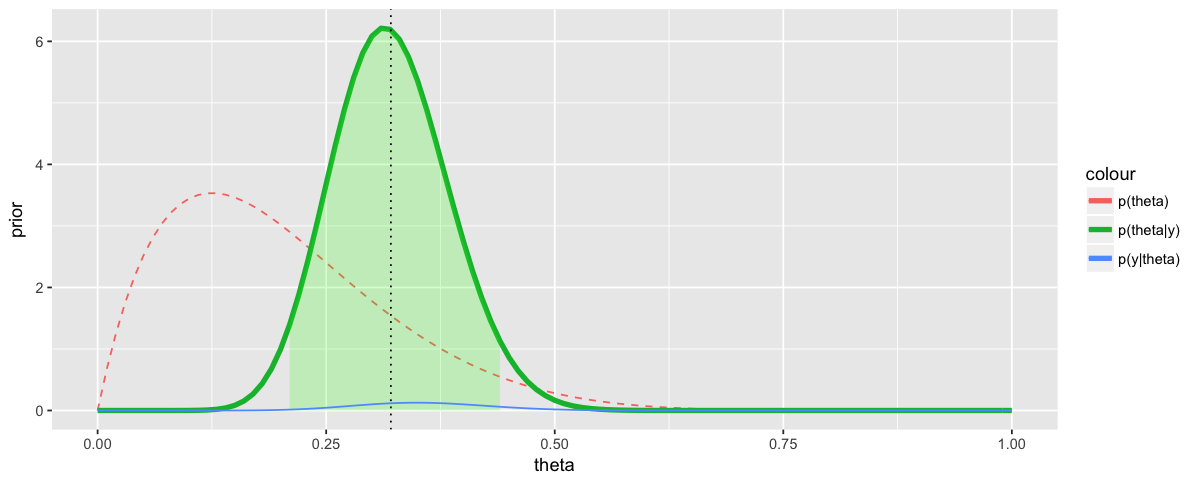

In [25]:
options(repr.plot.width=10, repr.plot.height=4)
library(ggplot2)

plot_solution <- function(prior_a, prior_b) {
    k = 15
    size = 43
    post_a = prior_a+k
    post_b = prior_b+size-k

    theta <- seq(from=0, to=1, by=0.01)
    data <- data.frame(
        theta=theta,
        prior = dbeta(theta, prior_a, prior_b),
        likelihood = dbinom(k, size=size, prob=theta),
        posterior = dbeta(theta, post_a, post_b))

    posterior <- function(xs) {
        ci <- pbeta(c(0.025, 0.975), post_a, post_b)
        ys <- dbeta(xs, post_a, post_b)
        ys[ci[1] <= ys & ys <= ci[2]] <- NA
        ys
    }

    ggplot(data, aes(theta)) +
        geom_line(aes(y=prior, color='p(theta)'), linetype=2) +
        geom_line(aes(y=posterior, color='p(theta|y)'), size=1.5) +
        stat_function(fun = posterior, geom = "area", fill="green", alpha=0.2) +
        geom_line(aes(y=likelihood, color='p(y|theta)')) +
        geom_vline(xintercept = post_a/(post_a + post_b), linetype=3)
}

plot_solution(2, 8)

##### Problem B

> Repeat a), but using a $beta(8,2)$ prior for $\theta$.

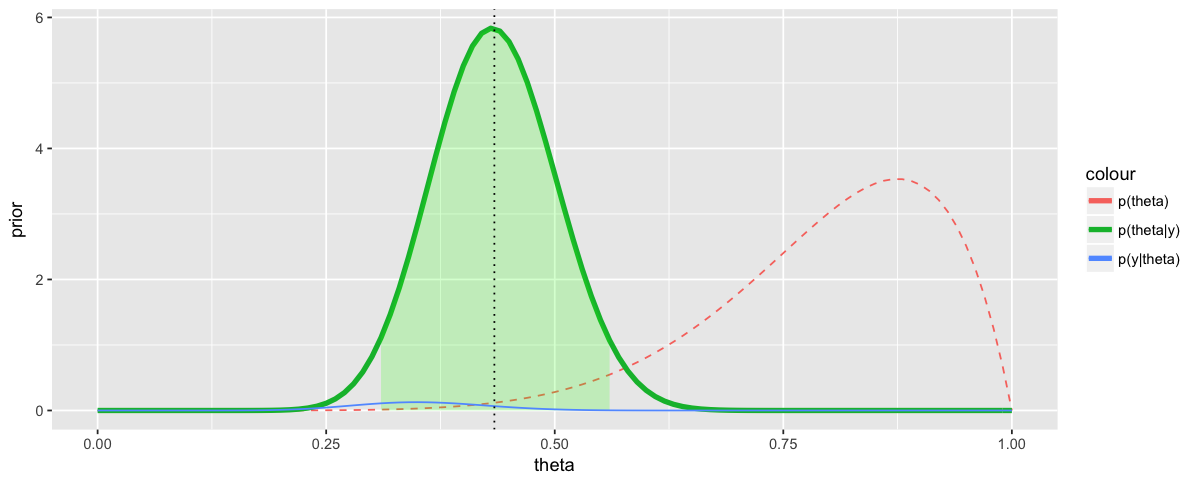

In [26]:
plot_solution(8, 2)

##### Problem C

> Consider the following prior distribution for $\theta$:
$$
p(\theta) = \frac{1}{4} \cdot \frac{\Gamma(10)}{\Gamma(2)\Gamma(8)}[3\theta(1-\theta)^7 + \theta^7(1-\theta)]
$$
which is a 75-25% mixture of a $beta(2,8)$ and a $beta(8,2)$ prior distribution.

> Plot this prior distribution and compare it to the priors in a) and b). Describe what sort of prior opinion this may represent.

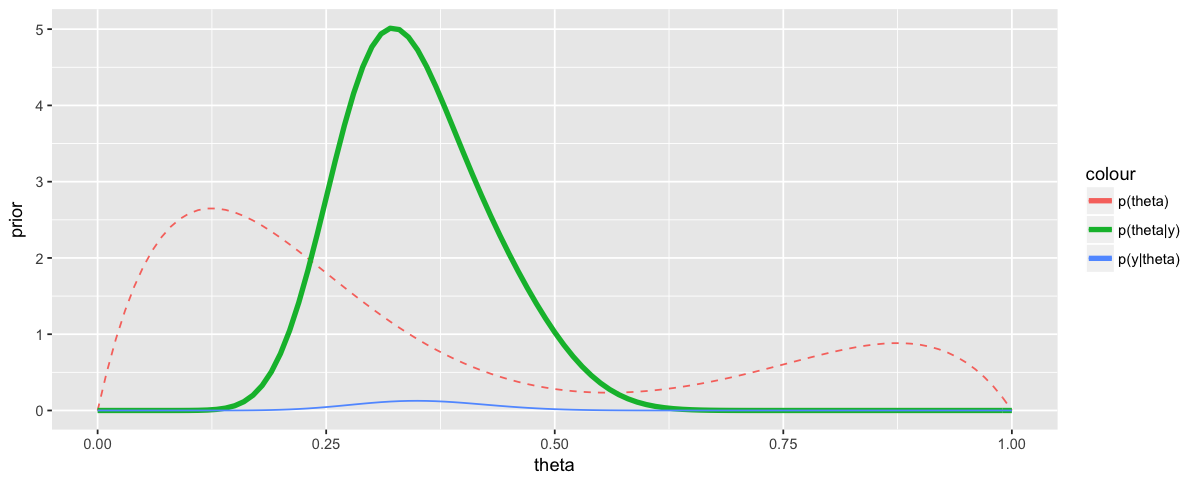

In [27]:
k = 15
size = 43

theta <- seq(from=0, to=1, by=0.01)
data <- data.frame(
    theta=theta,
    prior = 0.75*dbeta(theta, 2, 8) + 0.25*dbeta(theta, 8, 2),
    likelihood = dbinom(k, size=size, prob=theta),
    posterior = 0.75*dbeta(theta, k+2, size-k+8) + 0.25*dbeta(theta, k+8, size-k+2))

ggplot(data, aes(theta)) +
    geom_line(aes(y=prior, color='p(theta)'), linetype=2) +
    geom_line(aes(y=posterior, color='p(theta|y)'), size=1.5) +
    geom_line(aes(y=likelihood, color='p(y|theta)'))

##### Problem D

> For the prior in c):

>   i. Write out mathematically $p(\theta) \cdot p(y|\theta)$ and simplify as much as possible.

>   ii. The posterior distribution is a mixture of two distributions you know. Identify these distributions.

>   iii. On a computer, calculate and plot $p(\theta) \cdot p(y|\theta)$ for a variety of $\theta$ values. Also find (approximately) the posterior mode, and discuss its relation to the modes in a) and b).

##### Solution

Given:
$$
\begin{align}
p(\theta) &= \frac{3}{4}beta(2, 8) + \frac{1}{4}beta(8, 2)\\
p(y|\theta) &= binom(15, 43, \theta)
\end{align}
$$

Let's derive $p(\theta|y)$:
$$
\begin{align}
p(\theta|y) &\propto p(y|\theta) \cdot p(\theta)\\
&= binom(15, 43, \theta) \cdot [\frac{3}{4}beta(2, 8) + \frac{1}{4}beta(8, 2)]\\
&\propto \frac{3}{4}beta(2+15, 8+43-15) + \frac{1}{4}beta(8+15, 2+43-15)
\end{align}
$$

The posterior distribution is a mixture for 2 beta distributions.

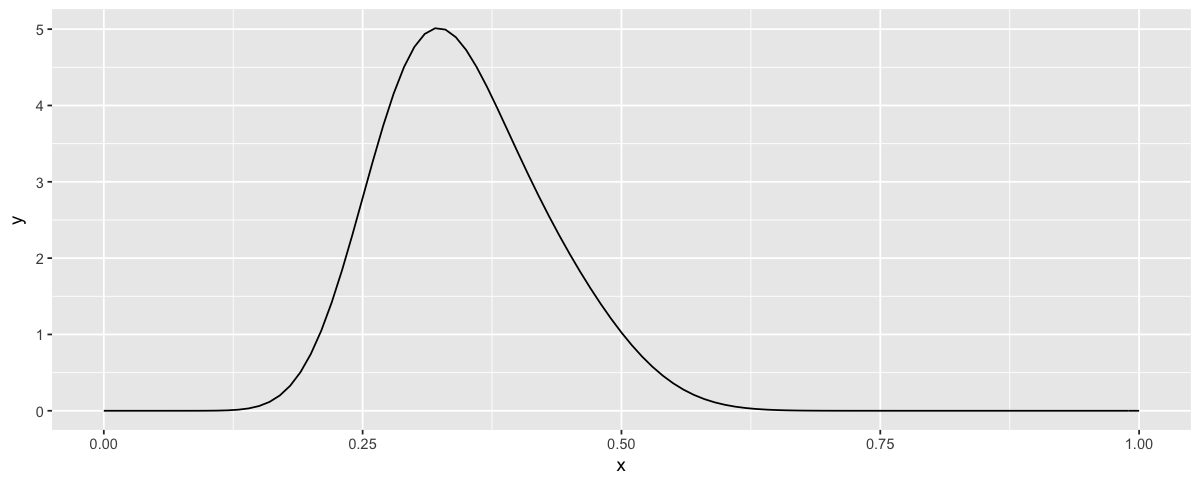

In [30]:
dfoo <- function(x) {
    3/4 * dbeta(x, 2+k, 8+size-k) + 1/4*dbeta(x, 8+k, 2+size-k)
}

rfoo <- function(n) {
    3/4 * rbeta(n, 2+k, 8+size-k) + 1/4*rbeta(n, 8+k, 2+size-k)
}

ggplot(data.frame(x=seq(0,1,by=0.1)), aes(x)) + stat_function(fun=dfoo)

In [31]:
mean(rfoo(10000))
median(rfoo(10000))

[1] 0.348901

[1] 0.3467201

##### Problem D

> Find a general formula for the weights of the mixture distribution in d)ii, and provide an interpretation for their values.

##### Solution

All weights sums to 1:
$$
\sum_{i=1}^{n} w_i = 1
$$

Then posterior is:
$$
\sum_{i=1}^{n} [ w_i \cdot beta(a_{i0} + a, b_{i0} + b)]
$$